In [1]:
from functools import reduce
import numpy as np
from constants import *
from green_function import *
#import holoviews
from scipy import linalg as sla
import matplotlib as mp
plt.style.use('seaborn')		# Setting the plotting style
mp.rcParams['figure.figsize'] = (15, 10)  # Setting the size of the plots
import numpy.linalg as la 
from tqdm.notebook import tqdm


In [2]:
N_floquet_bands = 3
N = 100
J_z = np.diag(np.arange(-(N_floquet_bands-1)/2,1+(N_floquet_bands-1)/2))
Id_floquet_bands = np.eye(N_floquet_bands)
t = np.pi
mu = 0
mu2 = t 
T = 0.4
delta = 1*t
fourier_step_function = np.zeros((N_floquet_bands,N_floquet_bands),dtype=complex)
for i in range(N_floquet_bands):
    for j in range(N_floquet_bands):
        if i != j:
            fourier_step_function[i,j] = 1/(1j*np.pi*(i-j))
        else:
            fourier_step_function[i,j] = 0.5


In [3]:
def onsite(mu=mu, mu2 = mu2,period=T):
    return -mu * np.kron(s_z,Id_floquet_bands) - (2*np.pi/period) * np.kron(s_0,J_z) - (mu2-mu)* np.kron(s_z,fourier_step_function)


def hopping(t=t, delta=delta):
    return -t * np.kron(s_z,Id_floquet_bands) - 1j * delta * np.kron(s_y,Id_floquet_bands) 

In [4]:
def calculate_finite_spectrum(periods,mu=mu,mu2=mu2,t=t,delta=delta,N=N,d=d,N_floquet_bands=N_floquet_bands):
    energies = []
    for T in tqdm(periods):
        h = Hamiltonian(d*N_floquet_bands,N,onsite(mu=mu,mu2=mu2,period=T),hopping(delta=delta,t=t)).lattice_hamiltonian()
        phases = la.eigvalsh(h)
        #phases = np.sort(np.abs(phases))
        #ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        #energies.append(ev)
        energies.append(phases)
    return np.array(energies).real


period = T


def calculate_bands(momenta, mu=mu,mu2=mu2,t=t,delta=delta,N=N,d=d,N_floquet_bands=N_floquet_bands,period=period):
    energies = []
    for k in momenta:
        h = Hamiltonian(d*N_floquet_bands,N,onsite(mu=mu,mu2=mu2,period=period),hopping(delta=delta,t=t)).k_space_hamiltonian(k)
        phases = la.eigvalsh(h)
        #phases = np.sort(np.abs(phases))
        #ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        #energies.append(ev)
        energies.append(phases)
    return np.array(energies).real


def plot_spectrum(Hmat):
    evals,evecs = la.eigh(Hmat)
    evals = evals.real
    plt.scatter(np.arange(len(evals)),evals)
    plt.title('Energy Spectrum of Chain with {} Sites'.format(N))
    plt.show()



In [5]:
h = Hamiltonian(d*N_floquet_bands,N,onsite(),hopping())


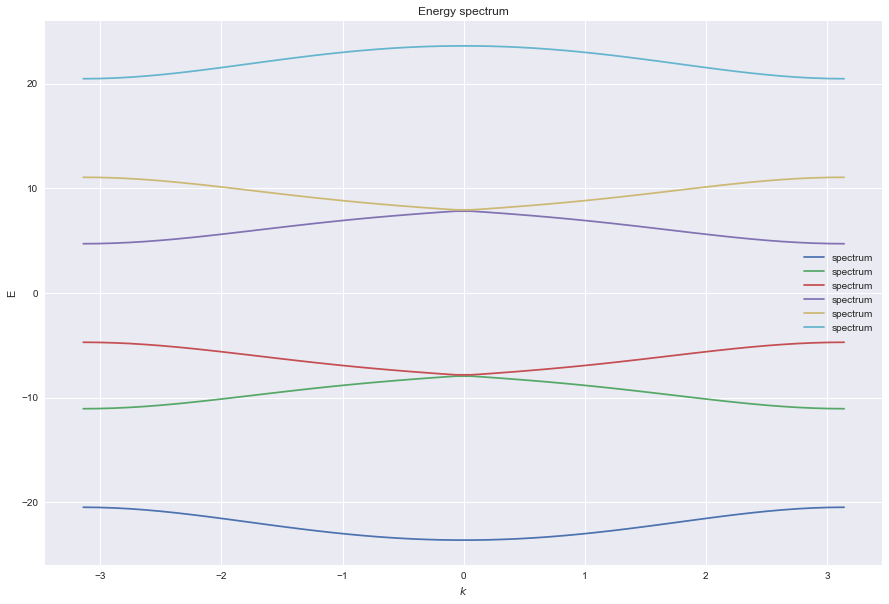

In [6]:
h.plot_spectrum()

In [7]:
h = Hamiltonian(d*N_floquet_bands,N,onsite(period=T),hopping())


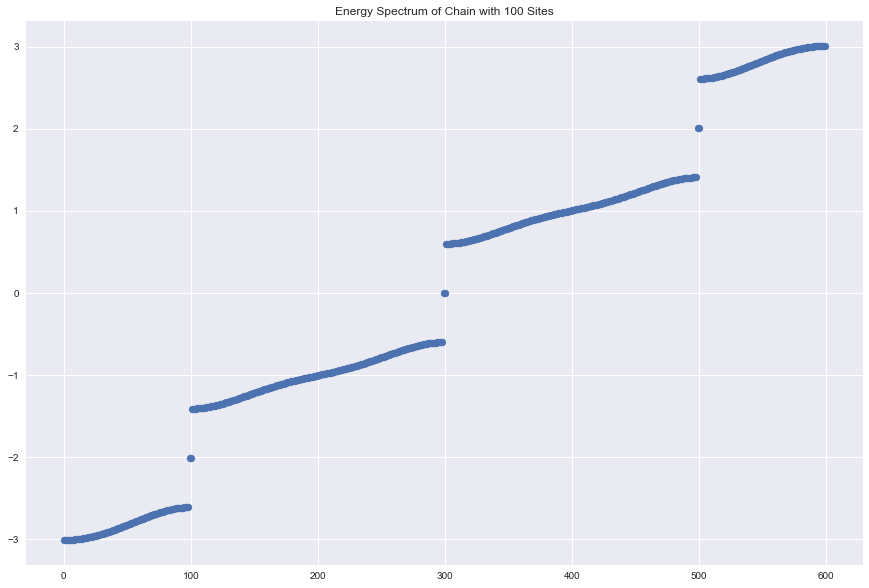

In [8]:
w = 2*np.pi/T
plot_spectrum(2*h.lattice_hamiltonian()/(w))

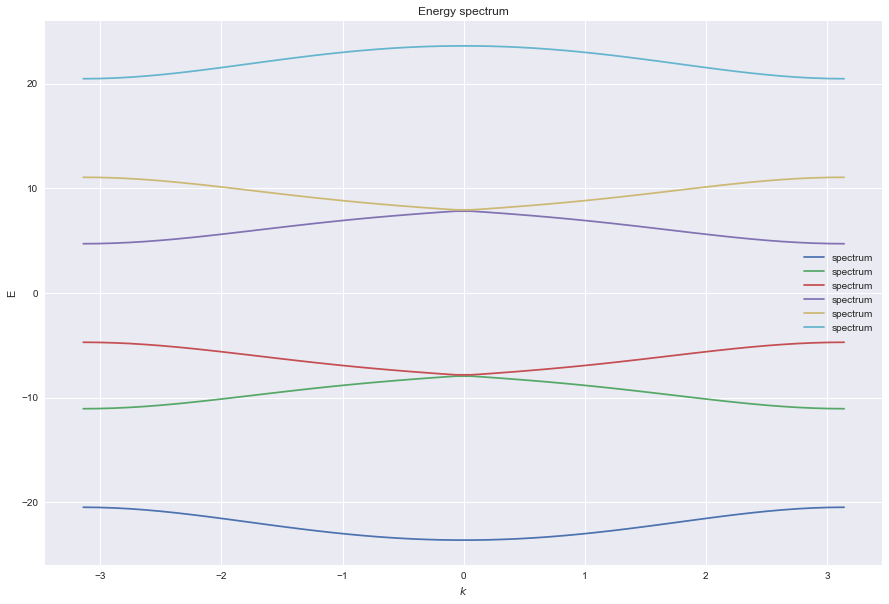

In [9]:
h.plot_spectrum()

In [10]:
periods = np.linspace(0.2 / t, 10 / t, 100)
momenta = np.linspace(-2*np.pi, 2*np.pi,100)


spectrum = np.array([calculate_bands(momenta, period=T) for T in tqdm(periods)])

  0%|          | 0/100 [00:00<?, ?it/s]

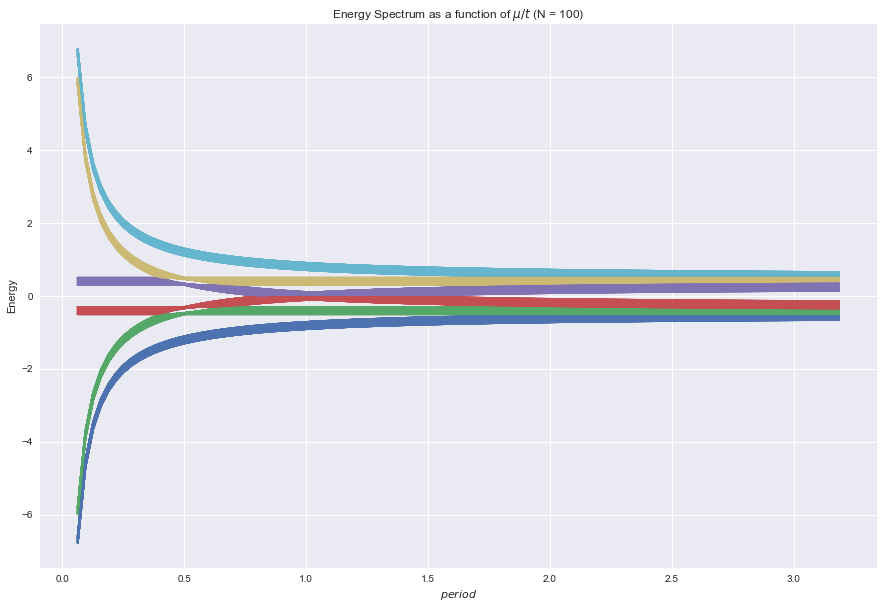

In [11]:
plt.title("Energy Spectrum as a function of $\mu/t$ (N = {})".format(N))
for i in range(100):
    plt.plot(periods,spectrum[:,i]/w)
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()
#plt.savefig('interesting bulk spectrum.png')

In [12]:
energies = calculate_finite_spectrum(periods)

  0%|          | 0/100 [00:00<?, ?it/s]

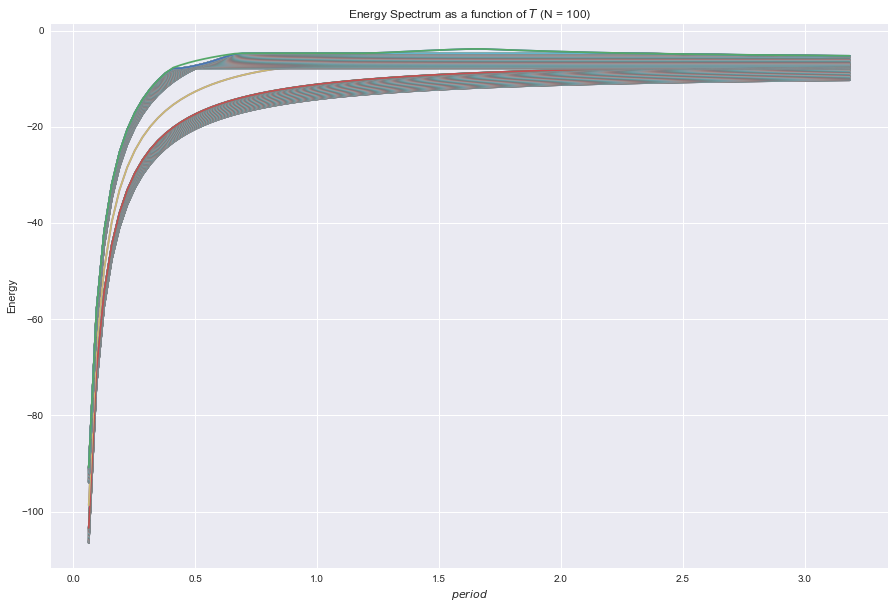

In [13]:
plt.title("Energy Spectrum as a function of $T$ (N = {})".format(N))
for i in range(d*N):
    plt.plot(periods,energies[:,i])
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()

In [14]:
print(fourier_step_function*np.pi)

[[ 1.57079633+0.j  -0.        +1.j  -0.        +0.5j]
 [ 0.        -1.j   1.57079633+0.j  -0.        +1.j ]
 [ 0.        -0.5j  0.        -1.j   1.57079633+0.j ]]


In [15]:
print(J_z)

[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]


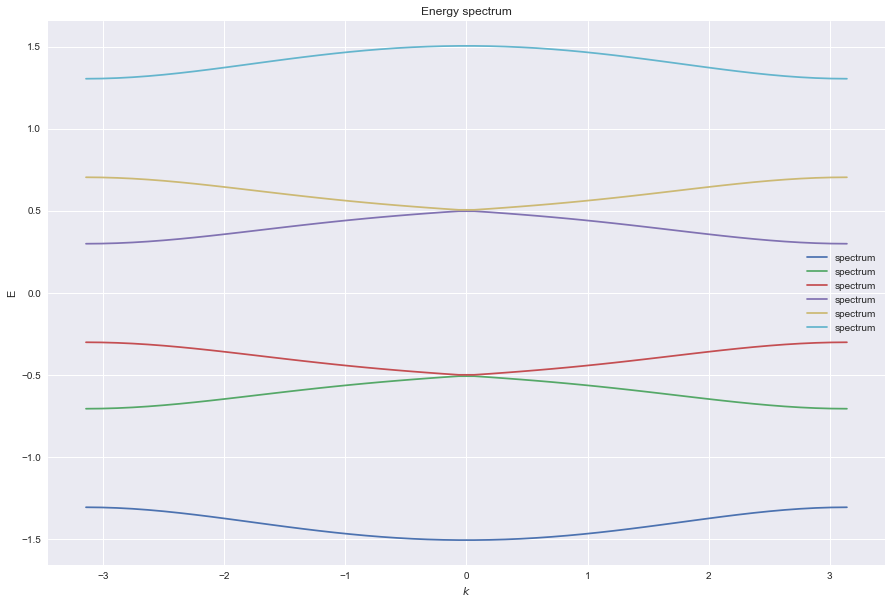

In [16]:
var_k = np.linspace(-np.pi,np.pi,50)
spectrum = []
for i in range(len(var_k)):
    unsorted_eval=la.eigvals(h.k_space_hamiltonian(k=var_k[i])/w)
    unsorted_eval = np.sort(np.abs(unsorted_eval))
    ev = np.sort([(-1) ** n * val for n, val in enumerate(unsorted_eval)])
    spectrum.append(ev)
plt.title("Energy spectrum")
plt.plot(var_k,spectrum, label='spectrum')
#plt.plot(var_mu/t,G_img-F_img,label = 'G_img-F_img')
plt.ylabel('E')
plt.xlabel('$k$')
plt.legend()
plt.show()

In [17]:
def onsite(mu=mu, mu2 = mu2,period=T):
    return -mu * np.kron(s_z,Id_floquet_bands) - (2*np.pi/period) * np.kron(s_0,J_z) - (mu2-mu)* np.kron(s_z,fourier_step_function)


def hopping(t=t, delta=delta, mu = mu):
    return -t * np.kron(s_z,Id_floquet_bands) - 1j * delta * np.kron(s_y,Id_floquet_bands) 

In [18]:
period = T
def kitaev_hamiltonian(k):
     h = -mu * np.kron(s_z,Id_floquet_bands) - (2*np.pi/period) * np.kron(s_0,J_z) - (mu2-mu)* np.kron(s_z,fourier_step_function)  -2 * t * np.kron(s_z,Id_floquet_bands) * np.cos(k) - 2 * delta * np.kron(s_y,Id_floquet_bands) * np.sin(k)
     return h 

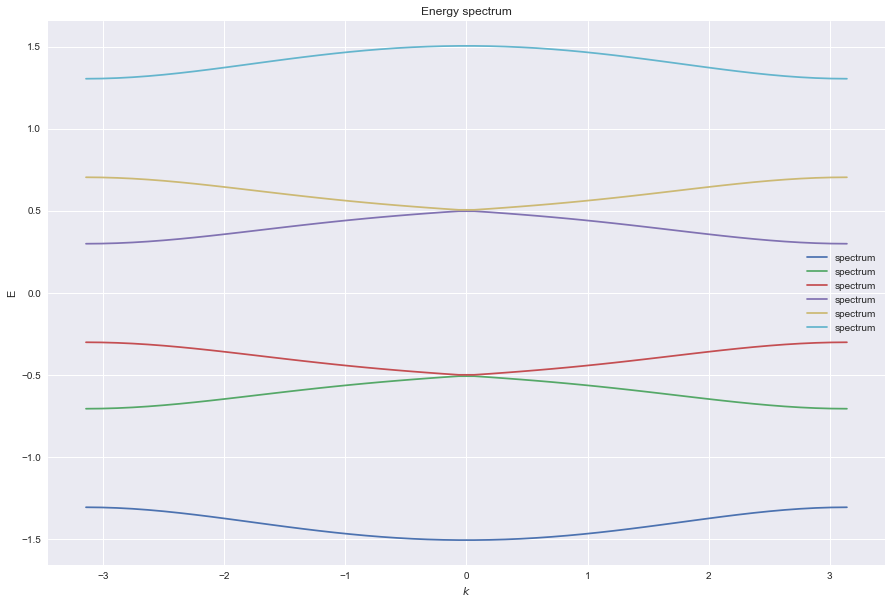

In [19]:
var_k = np.linspace(-np.pi,np.pi,50)
spectrum = []
for i in range(len(var_k)):
    unsorted_eval=la.eigvals(kitaev_hamiltonian(k=var_k[i])/w)
    unsorted_eval = np.sort(np.abs(unsorted_eval))
    ev = np.sort([(-1) ** n * val for n, val in enumerate(unsorted_eval)])
    spectrum.append(ev)
plt.title("Energy spectrum")
plt.plot(var_k,spectrum, label='spectrum')
#plt.plot(var_mu/t,G_img-F_img,label = 'G_img-F_img')
plt.ylabel('E')
plt.xlabel('$k$')
plt.legend()
plt.show()